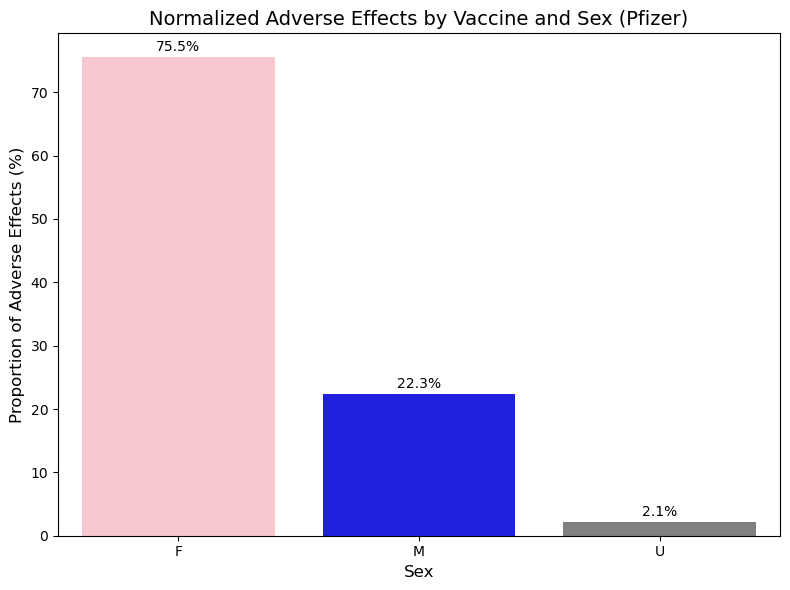

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Pfizer_VAERS_with_Adverse_Effects_and_Organs.csv'
df = pd.read_csv(file_path)

# Group data by sex and calculate counts for adverse effects
adverse_effects_by_sex = df.groupby('SEX')['Adverse Effects'].count().reset_index()
adverse_effects_by_sex.columns = ['SEX', 'Count']

# Calculate the total and normalize the counts
total_count = adverse_effects_by_sex['Count'].sum()
adverse_effects_by_sex['Proportion'] = (adverse_effects_by_sex['Count'] / total_count) * 100

# Define colors for each sex
colors = {'F': 'pink', 'M': 'blue', 'U': 'gray'}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=adverse_effects_by_sex, x='SEX', y='Proportion', palette=colors)

# Add annotations on top of bars
for index, row in adverse_effects_by_sex.iterrows():
    plt.text(index, row['Proportion'] + 1, f"{row['Proportion']:.1f}%", color='black', ha="center", fontsize=10)

# Add title and axis labels
plt.title('Normalized Adverse Effects by Vaccine and Sex (Pfizer)', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Proportion of Adverse Effects (%)', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


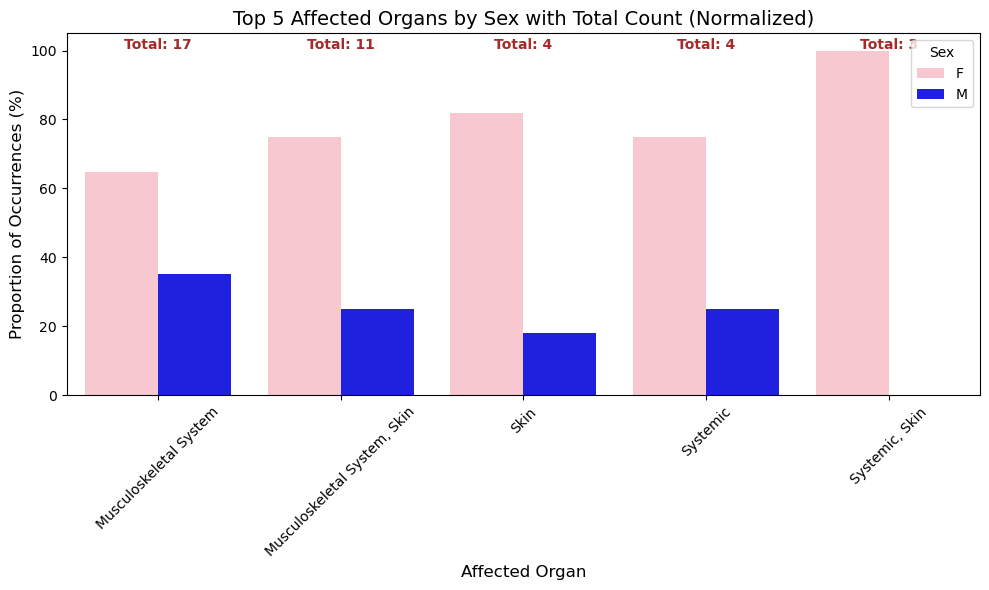

In [2]:
# Load the dataset
file_path = 'Pfizer_VAERS_with_Adverse_Effects_and_Organs.csv' 
df = pd.read_csv(file_path)

# Explode the 'Organs Affected' column to handle multiple organs per row
df_exploded = df.explode('Organs Affected')

# Remove rows with '0' in 'Organs Affected'
df_exploded = df_exploded[df_exploded['Organs Affected'] != '0']

# Group by 'Organs Affected' and 'SEX' to get counts
organ_sex_counts = df_exploded.groupby(['Organs Affected', 'SEX']).size().reset_index(name='Count')

# Calculate the total counts for each organ across all sexes
total_counts = organ_sex_counts.groupby('Organs Affected')['Count'].sum().reset_index()
total_counts.columns = ['Organs Affected', 'Total Count']

# Merge the total counts back into the main data
organ_sex_counts = organ_sex_counts.merge(total_counts, on='Organs Affected')

# Normalize the counts by the total count for each organ
organ_sex_counts['Proportion'] = (organ_sex_counts['Count'] / organ_sex_counts['Total Count']) * 100

# Get the top 5 affected organs by total count
top_5_organs = total_counts.nlargest(5, 'Total Count')['Organs Affected']

# Filter the data for the top 5 organs
filtered_data = organ_sex_counts[organ_sex_counts['Organs Affected'].isin(top_5_organs)]

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_data,
    x='Organs Affected',
    y='Proportion',
    hue='SEX',
    palette={'F': 'pink', 'M': 'blue', 'U': 'gray'}
)

# Add annotations for total counts on top of each organ bar group
for organ in top_5_organs:
    total = total_counts[total_counts['Organs Affected'] == organ]['Total Count'].values[0]
    plt.text(x=top_5_organs.tolist().index(organ), y=100.5, s=f"Total: {int(total)}", 
             color='brown', ha='center', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title('Top 5 Affected Organs by Sex with Total Count (Normalized)', fontsize=14)
plt.xlabel('Affected Organ', fontsize=12)
plt.ylabel('Proportion of Occurrences (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
# Split combined labels into multiple rows
df_exploded = df_exploded.assign(
    Organs_Affected_Split=df_exploded['Organs Affected'].str.split(', ')
).explode('Organs_Affected_Split')

# Replace the original column with the split column
df_exploded['Organs Affected'] = df_exploded['Organs_Affected_Split']
df_exploded = df_exploded.drop(columns=['Organs_Affected_Split'])

# Remove invalid rows
df_exploded = df_exploded[df_exploded['Organs Affected'].notnull() & (df_exploded['Organs Affected'] != '0')]

# Debug: Check unique values after splitting
print("Unique Organs Affected after splitting:")
print(df_exploded['Organs Affected'].unique())


Unique Organs Affected after splitting:
['Musculoskeletal System' 'Digestive System' 'Skin' 'Systemic'
 'Nervous System']


In [14]:
# Count occurrences of each organ
organ_counts = df_exploded['Organs Affected'].value_counts().reset_index()
organ_counts.columns = ['Organs Affected', 'Count']

# Debug: Print the recalculated top 5 organs
print("Top 5 Affected Organs (Recalculated):")
print(organ_counts.head(5))

# Get the top 5 affected organs by count
top_5_organs = organ_counts.nlargest(5, 'Count')


Top 5 Affected Organs (Recalculated):
          Organs Affected  Count
0  Musculoskeletal System     38
1                    Skin     37
2                Systemic     32
3        Digestive System      8
4          Nervous System      8


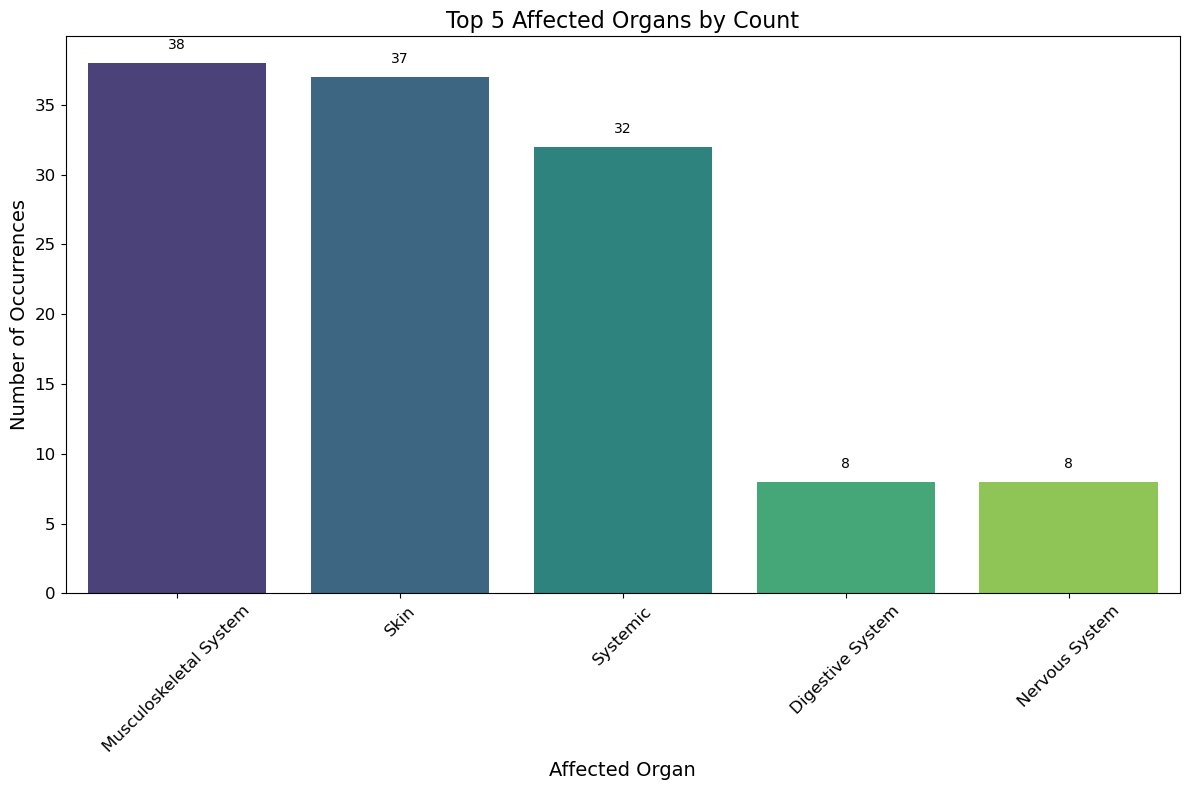

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_organs, x='Organs Affected', y='Count', palette='viridis')

# Add annotations for total counts
for index, row in top_5_organs.iterrows():
    plt.text(index, row['Count'] + 1, str(row['Count']), color='black', ha="center", fontsize=10)

# Add title and labels
plt.title('Top 5 Affected Organs by Count', fontsize=16)
plt.xlabel('Affected Organ', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


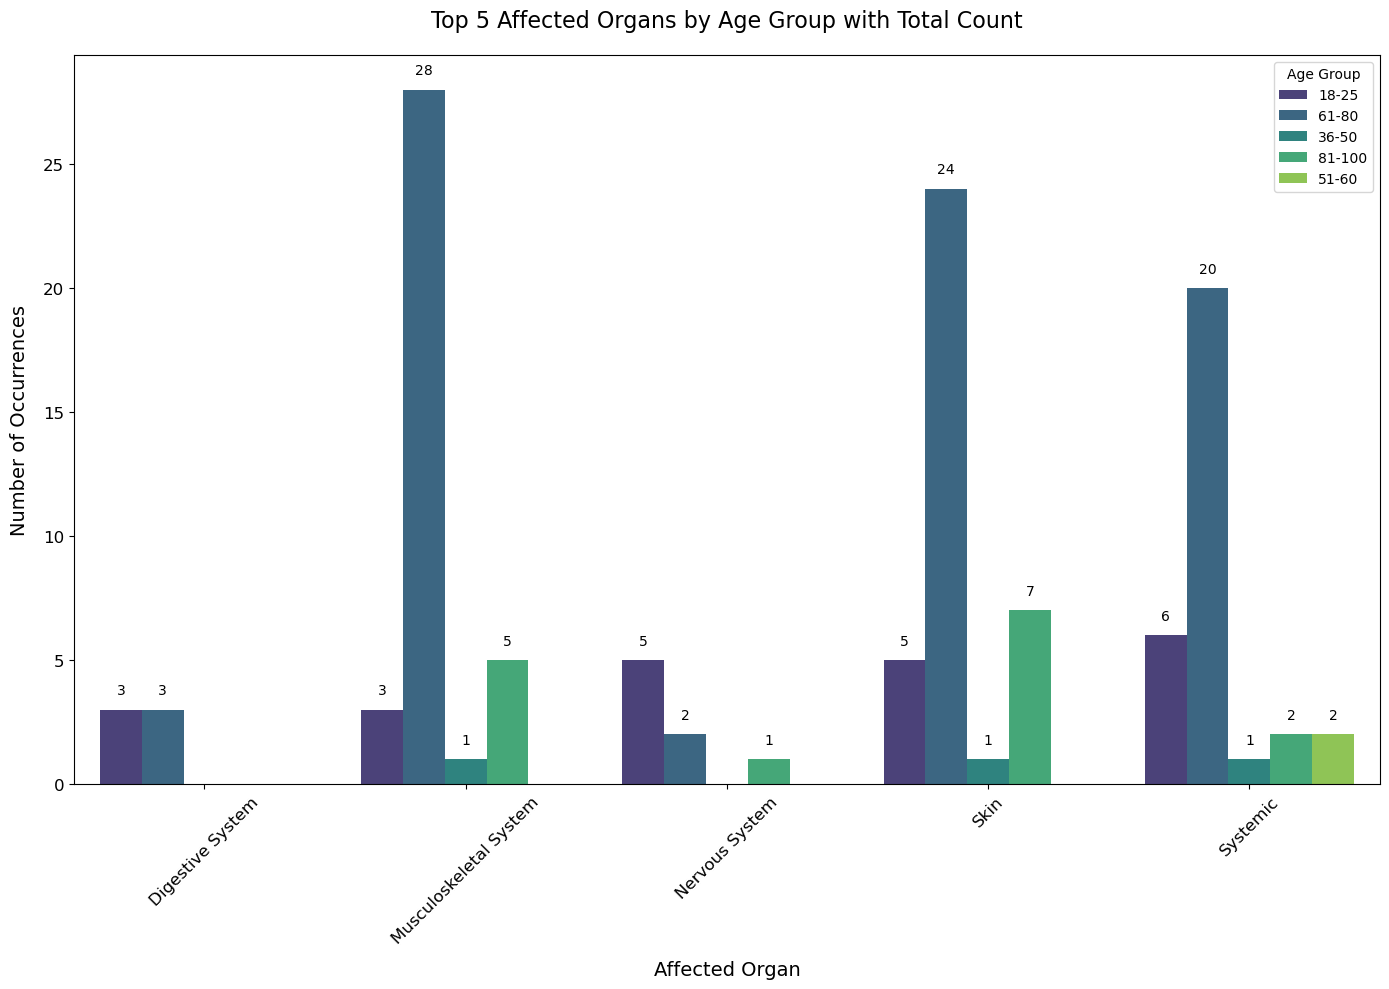

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    data=filtered_data,
    x='Organs Affected',
    y='Count',
    hue='AGE_GROUP',
    palette='viridis'
)

# Dynamically adjust annotations for grouped bars
for bar in barplot.patches:
    bar_x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    bar_height = bar.get_height()  # Height of the bar
    if bar_height > 0:  # Only annotate non-zero bars
        plt.text(
            x=bar_x,
            y=bar_height + 0.5,  # Offset above the bar
            s=f"{int(bar_height)}",
            ha='center',
            va='bottom',
            fontsize=10
        )

# Add titles and labels
plt.title('Top 5 Affected Organs by Age Group with Total Count', fontsize=16, pad=20)
plt.xlabel('Affected Organ', fontsize=14, labelpad=10)
plt.ylabel('Number of Occurrences', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Age Group', loc='upper right')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


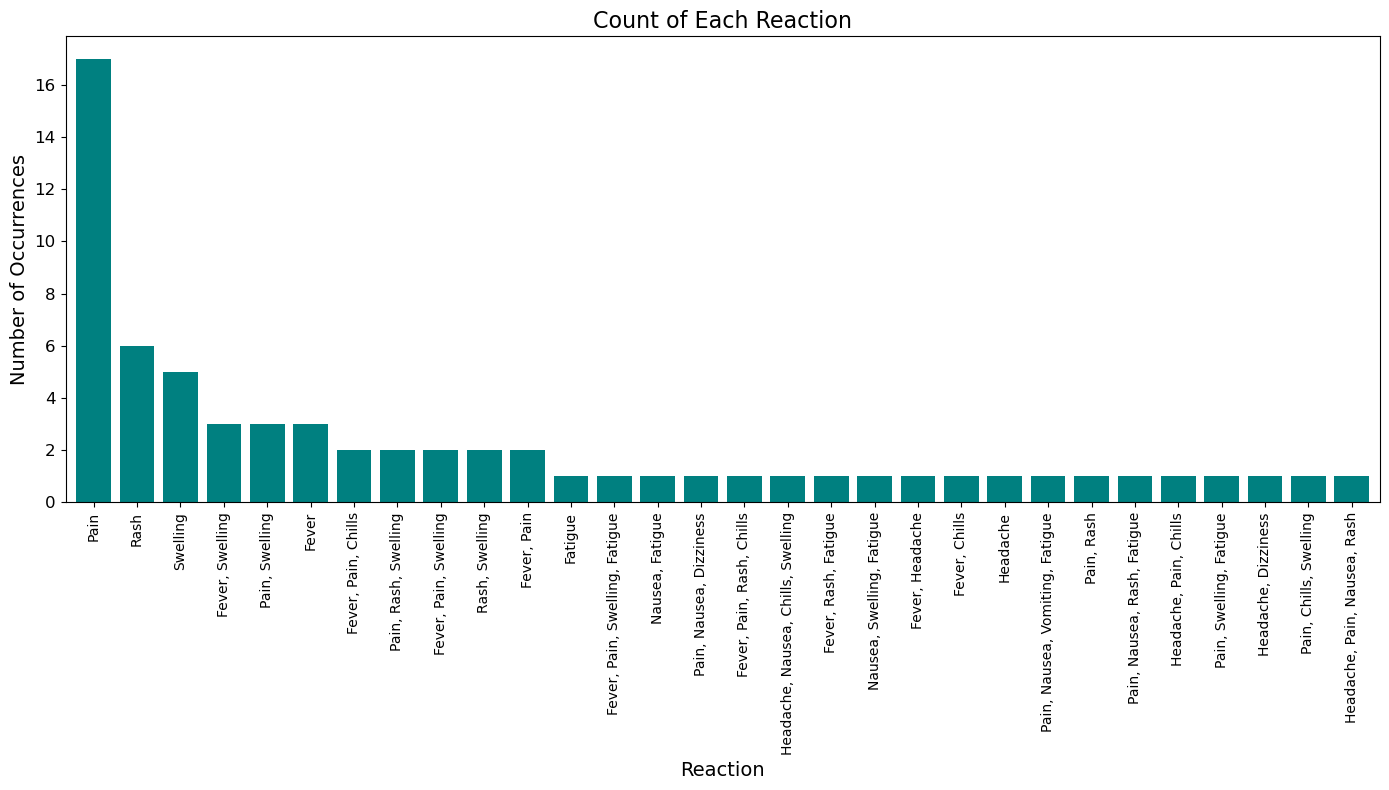

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Pfizer_VAERS_with_Adverse_Effects_and_Organs.csv'
df = pd.read_csv(file_path)

# Explode the 'Adverse Effects' column to handle multiple reactions per row
df_exploded = df.explode('Adverse Effects')

# Remove invalid rows (like '0')
df_exploded = df_exploded[df_exploded['Adverse Effects'] != '0']

# Count occurrences of each reaction
reaction_counts = df_exploded['Adverse Effects'].value_counts()

# Plot the data
plt.figure(figsize=(14, 8))
reaction_counts.plot(kind='bar', color='teal', width=0.8)

# Add labels and title
plt.title('Count of Each Reaction', fontsize=16)
plt.xlabel('Reaction', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


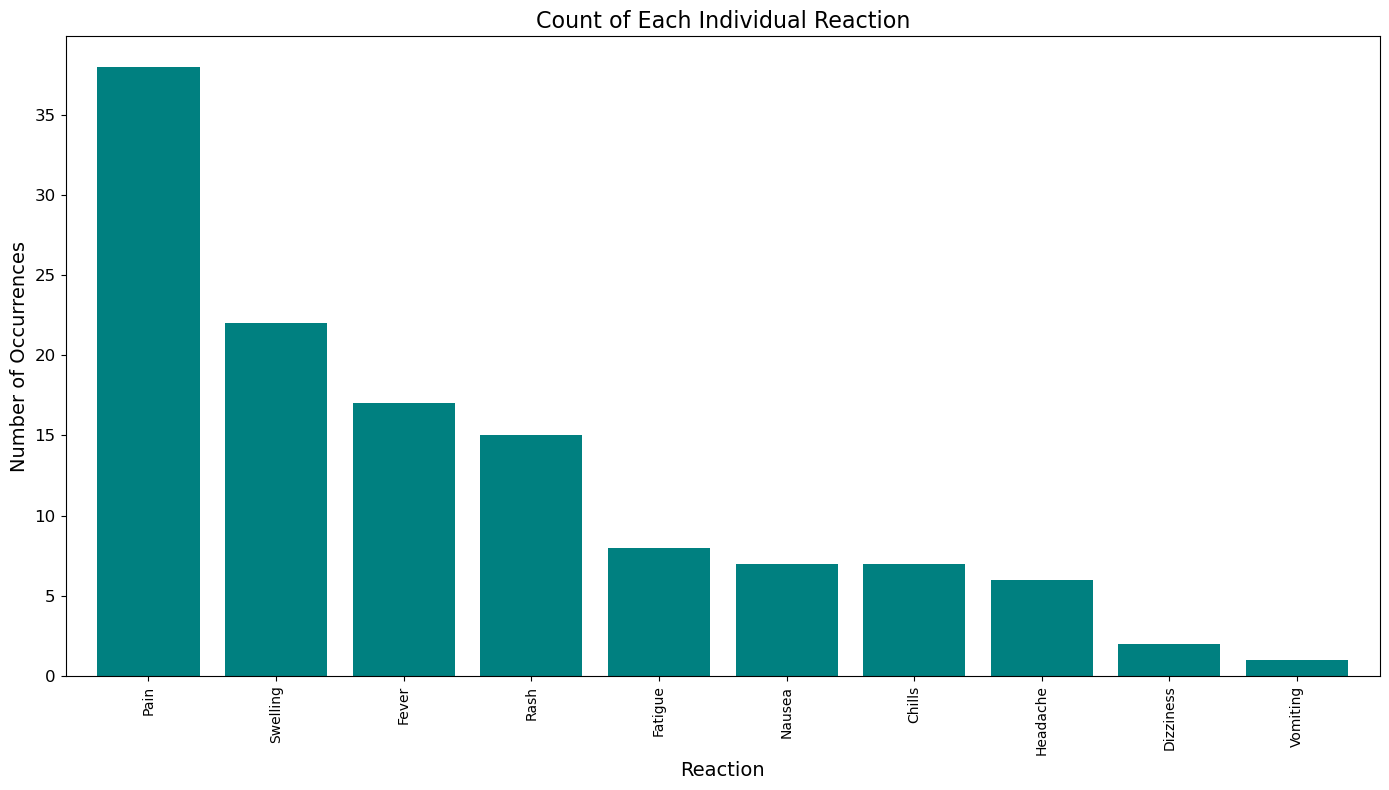

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Pfizer_VAERS_with_Adverse_Effects_and_Organs.csv'
df = pd.read_csv(file_path)

# Explode the 'Adverse Effects' column to handle multiple reactions per row
df_exploded = df.explode('Adverse Effects')

# Split individual adverse effects into separate rows
df_exploded = df_exploded.assign(
    Individual_Reactions=df_exploded['Adverse Effects'].str.split(', ')
).explode('Individual_Reactions')

# Remove invalid rows, including '0'
df_exploded = df_exploded[df_exploded['Individual_Reactions'].notnull()]
df_exploded = df_exploded[df_exploded['Individual_Reactions'] != '0']

# Count occurrences of each individual reaction
individual_reaction_counts = df_exploded['Individual_Reactions'].value_counts()

# Plot the data
plt.figure(figsize=(14, 8))
individual_reaction_counts.plot(kind='bar', color='teal', width=0.8)

# Add labels and title
plt.title('Count of Each Individual Reaction', fontsize=16)
plt.xlabel('Reaction', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


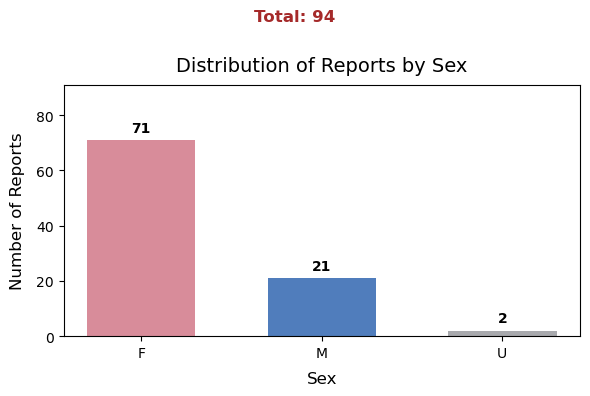

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Pfizer_VAERS_with_Adverse_Effects_and_Organs.csv'
df = pd.read_csv(file_path)

# Count the number of reports by sex
sex_counts = df['SEX'].value_counts()

# Calculate the total number of reports
total_reports = sex_counts.sum()

# Plot the data
plt.figure(figsize=(6, 4))
bars = plt.bar(sex_counts.index, sex_counts.values, color=['#D88C9A', '#507DBC', '#A8A9AD'], width=0.6)

# Adjust the y-axis limit to create space for annotations
plt.ylim(0, max(sex_counts.values) + 20)

# Add annotations for counts on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,  # Slightly above the bar
        f"{int(bar.get_height())}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Add total count annotation above the plot, completely outside the chart area
plt.figtext(
    0.5, 0.95,  # Position at the top center of the figure
    f"Total: {total_reports}",
    color='brown',
    ha='center',
    fontsize=12,
    fontweight='bold'
)

# Add titles and labels
plt.title('Distribution of Reports by Sex', fontsize=14, pad=10)  # Reduced padding to avoid conflict
plt.xlabel('Sex', fontsize=12, labelpad=8)
plt.ylabel('Number of Reports', fontsize=12, labelpad=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to prevent excess spacing
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Reserve space for the annotation

# Show the plot
plt.show()


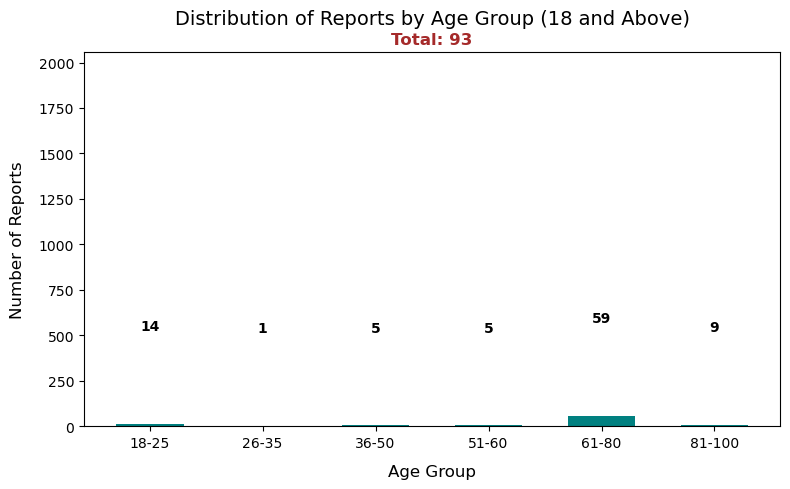

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Pfizer_VAERS_with_Adverse_Effects_and_Organs.csv' 
df = pd.read_csv(file_path)

# Count the number of reports by age group
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Calculate the total number of reports
total_reports = age_group_counts.sum()

# Plot the data
plt.figure(figsize=(8, 5))  # Explicitly set a reasonable figure size
bars = plt.bar(age_group_counts.index, age_group_counts.values, color='teal', width=0.6)

# Set a reasonable y-axis limit
plt.ylim(0, max(age_group_counts.values) + 2000)

# Add annotations for counts on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,  # Slightly above the bar
        f"{int(bar.get_height())}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Add total count annotation above the plot
plt.text(
    0.5, 1.02,  # Relative position above the plot
    f"Total: {total_reports}",
    color='brown',
    ha='center',
    fontsize=12,
    fontweight='bold',
    transform=plt.gca().transAxes
)

# Add titles and labels
plt.title('Distribution of Reports by Age Group (18 and Above)', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12, labelpad=10)
plt.ylabel('Number of Reports', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ensure the layout is compact and avoids excessive space
plt.tight_layout()

# Show the plot
plt.show()
